<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- Regularization
- Principal Component Analysis
- Lagrange multipliers
- Explained variance 

<hr/>

### Linear Regression
- A linear combination of known $\phi_k(\cdot)$ **basis** functions 

>$\displaystyle f(t;\boldsymbol{\beta}) = \sum_{k=1}^K \beta_k\, \phi_k(t) = \boldsymbol{\beta}^T \boldsymbol{\phi}(t)$
><br/><br/>
> It's a dot product
>with $\boldsymbol{\beta}=(\beta_1,\dots,\beta_K)^T$

- Evaluated at all data points $x=(x_1,x_2,\dots,x_N)$

>$\displaystyle f(x;\boldsymbol{\beta}) = \boldsymbol{}X\boldsymbol\beta$
><br/><br/>
> where $X_{ik} = \phi_k(x_i)$

In [63]:
import numpy as np
from scipy.optimize import minimize

# Define the basis functions
phi = [lambda x: 1,  # phi_1(x) = 1
       lambda x: x,  # phi_2(x) = x
       lambda x: x**2]  # phi_3(x) = x^2

K = len(phi)

# Define the model function f(x) = sum(beta_k * phi_k(x)
def f(x, beta):
    return sum(beta[k] * phi[k](x) for k in range(K))

# Define the cost function C(beta) = sum(y_n - f(x_n))^2
def cost(beta, x, y):
    return np.sum((y - f(x, beta))**2)

# Given data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([2.1, 2.9, 4.15, 5.1, 6.1, 6.8])

# Initial guess for beta (all zeros)
# need to do this because the minimize function requires an initial guess
beta_guess = np.zeros(K)

# Minimize the cost function
result = minimize(cost, beta_guess, args=(x, y))

# Print the best fit beta
print("Best fit beta:", result.x)

Best fit beta: [ 2.00357098  1.10678642 -0.02678586]


### Method of Least Squares

- At the optimum

>$\displaystyle {\hat\beta} = (X^T X)^{-1} X^T {y} $

- Hat matrix

>$\hat{y} = X\boldsymbol{\hat\beta} = H {y}$

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy

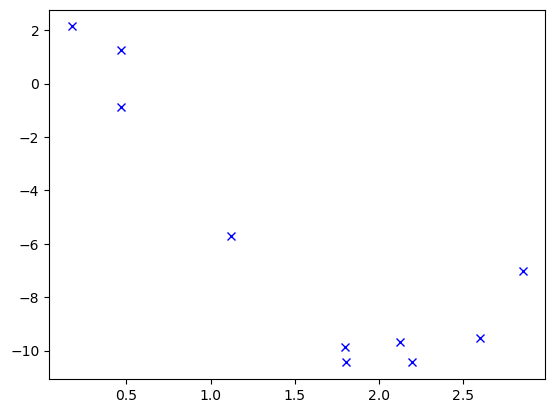

In [65]:
# generate a dataset with errors
np.random.seed(42)
x = 3 * np.random.rand(10) # uniform between 0 and 3
# x is a 1x10 array of random numbers between 0 and 3
eps = 1 * np.random.randn(x.size) # normal noise
y = 10*np.cos(x+1) + eps;  plt.plot(x,y,'bx');
# y is a 1x10 array of 10*cos(x+1) + noise

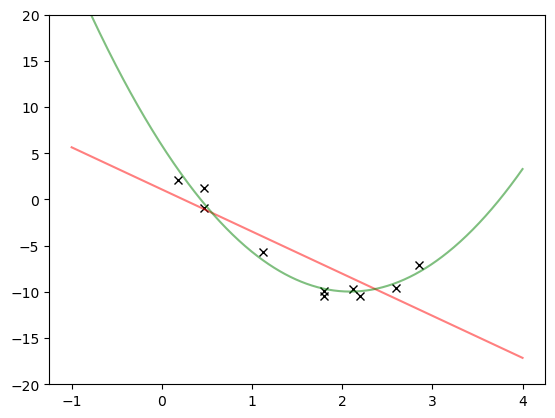

In [66]:
# design matrix for polynomial fitting
def poly(x,n):
    # x is the input vector, n is the degree of the polynomial
    # X is a matrix with x in the first column, x^2 in the second column, etc.
    # creates 
    X = np.zeros((x.size,n+1));
    # print(X.shape)
    for k in range(X.shape[1]):
        X[:,k] = x**k
    return X

# show data in black
plt.plot(x,y,'kx'); 
plt.ylim(-20,20);

xx = np.linspace(-1,4,500) # grid on x
color = 'yrgbm' * 5 # color sequence
# perform polynomial regression for n=1,2 (constant, linear, quadratic)
for n in range(1,3):
    X = poly(x,n) # design matrix for fitting
    bHat = np.linalg.pinv(X) @ y # matrix multiply
    yy = poly(xx,n) @ bHat # prediction
    plt.plot(xx,yy,'-',c=color[n],alpha=0.5);     
    # which function is green?

### Regularization

Penalize large coefficients of $\beta$

- **Ridge regression** uses $L_2$

> $\displaystyle \hat{\beta} = \arg\!\min_{\beta} \, \lvert y- X\beta \,\rvert^2_2\ + \lambda\,\lvert\beta\rvert^2_2$  
><br/>
> or even with a constant matrix $\Gamma$
><br/><br/>
> $\displaystyle \hat{\beta} = \arg\!\min_{\beta} \, \lvert y- X\beta \,\rvert^2_2 + \lambda\,\lvert\Gamma\beta\rvert^2_2$  

- This minimizes variance of the least squares regression line by adding a little bias to the line so that the lsrl doest overfit the training data so that the line can better fit the testing data. This additional penalization of the coefficients beta allows prediction to be made with the ridge regression line to be less sensitive to changes in the independent variable (x). Increased bias for decreased variability. As lambda increases in value, the slope of the lsrl decreases

- **Lasso regression** uses $L_1$

> $\displaystyle \hat{\beta} = \arg\!\min_{\beta}  \, \lvert y- X\beta \,\rvert^2_2 + \lambda\,\lvert\beta\rvert_1$ 
><br/><br/>
> $L_1$ yields sparse results

https://www.youtube.com/watch?v=NGf0voTMlcs

Different geometric meanings! 

### Linear Combinations

- Coefficients mix a given set of basis vectors, functions, images, shapes, ...

$$ f(x;\beta) = \sum_k \beta_k \phi_k(x) $$

> Fourier series

<img src=files/Periodic_identity_function.gif width=400> 
<!--<img src=https://upload.wikimedia.org/wikipedia/commons/e/e8/Periodic_identity_function.gif width=400> -->

> Discrete Cosine Transform (JPEG) 

<img src=files/DCT_basis_thumb.gif width=200>
<!--<img src=http://www.digitude.net/blog/wp-content/uploads/2010/07/DCT_basis_thumb.gif width=200>-->

> Spherical Harmonics

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Spherical_Harmonics.png/300px-Spherical_Harmonics.png>
<!--<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Spherical_Harmonics.png/300px-Spherical_Harmonics.png>-->

- What is a good basis like?



<h1><font color="yellow">Principal Component Analysis</font></h1>

### Statistical Learning

>|                | Supervised     |         Unsupervised     |
 |:---------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |



- The eigenvectors in PCA are another measure for variance (the larger the vector the larger the variance)

<!--<img src="files/800px-GaussianScatterPCA.png" width=300 align=left>-->
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/440px-GaussianScatterPCA.svg.png" width=300 align=left>


### Directions of Maximum Variance in 2D

- Let $X\in\mathbb{R}^2$ be a continuous random variable with $\mathbb{E}\left[X\right]=0$ mean and covariance matrix $C$. What is the direction of maximum variance?

- Let $\boldsymbol{X}$ represent the 2-dimensional vector of random scalar variables $X_1$ and $X_2$

>$\boldsymbol{X} = \begin{pmatrix} X_1 \\ X_2 \end{pmatrix}$

- Mean

>$\displaystyle \mathbb{E}[\boldsymbol{X}] = \begin{pmatrix}\mathbb{E}[X_1]\\\mathbb{E}[X_2]\end{pmatrix} = \begin{pmatrix}\mu_{X_1}\\\mu_{X_2}\end{pmatrix}$

- Covariance matrix

>$C = \mathbb{E}\Big[\big(\boldsymbol{X}\!-\!\mathbb{E}[\boldsymbol{X}]\big)\big(\boldsymbol{X}\!-\!\mathbb{E}[\boldsymbol{X}]\big)^T\Big] = \left( \begin{array}{cc}
\sigma_{X_1}^2 & \mathrm{C}_{X_1,X_2} \\
\mathrm{C}_{X_2,X_1} & \sigma_{X_2}^2
\end{array} \right)$

- Covariance matrix is symmetric which means it has the property where its eigenvalues are real and its eigenvectors are orthogonal

> For any vector $a\in\mathbb{R}^2$ , we find that the variance of the projected random vector X onto a
><br/><br/>
> $\displaystyle \mathbb{Var}[a^T X] = \mathbb{E}\left[\left(a^T X - 0\right)\left(X^T a - 0\right)\right] = \mathbb{E}\left[a^T \left(XX^T\right)\,a\right]$
><br/><br/>
> so
><br/><br/>
> $\displaystyle \mathbb{Var}[a^T X] = a^T\,\mathbb{E}\!\left[XX^T\right]\,a = a^T C\,a$
><br/><br/>
> We have to maximize this such that $a^2\!=\!1$

The condition `a^2 = 1` is a normalization constraint that ensures the vector `a` is a unit vector. In the context of Principal Component Analysis (PCA), this condition is used to avoid trivial solutions and to ensure that the principal components are scaled properly.

In the equation `a^2 = 1`, the `^2` operation represents the dot product of the vector `a` with itself, which is equivalent to the square of the length (or norm) of the vector. So, `a^2 = 1` means that the length of the vector `a` is 1, which is the definition of a unit vector.

This condition is important in PCA because we're interested in the direction that maximizes the variance of the projected data, not the magnitude of the projection. By constraining `a` to be a unit vector, we ensure that the solution is scale-invariant and only depends on the direction of `a`.

### Directions of Maximum Variance Generalizsation in N-D

- Let $X\in\mathbb{R}^N$ be a continuous random variable with $\mathbb{E}\left[X\right]=0$ mean and covariance matrix $C$. What is the direction of maximum variance?

- Let $\boldsymbol{X}$ represent the N dimensional-vector of random scalar variables $X$ to $X_N$

>$\boldsymbol{X} = \begin{pmatrix} X_1 \\ X_2 \\ \vdots \\ X_N \end{pmatrix}$
- Mean

>$\displaystyle \mathbb{E}[\boldsymbol{X}] = \begin{pmatrix}\mathbb{E}[X_1]\\\mathbb{E}[X_2]\\\vdots\\\mathbb{E}[X_N]\end{pmatrix} = \begin{pmatrix}\mu_{X_1}\\\mu_{X_2}\\\vdots\\\mu_{X_N}\end{pmatrix}$

- Covariance matrix

>$C = \mathbb{E}\Big[\big(\boldsymbol{X}\!-\!\mathbb{E}[\boldsymbol{X}]\big)\big(\boldsymbol{X}\!-\!\mathbb{E}[\boldsymbol{X}]\big)^T\Big] = \left( \begin{array}{cccc}
\sigma_{X_1}^2 & \mathrm{C}_{X_1,X_2} & \cdots & \mathrm{C}_{X_1,X_N} \\
\mathrm{C}_{X_2,X_1} & \sigma_{X_2}^2 & \cdots & \mathrm{C}_{X_2,X_N} \\
\vdots & \vdots & \ddots & \vdots \\
\mathrm{C}_{X_N,X_1} & \mathrm{C}_{X_N,X_2} & \cdots & \sigma_{X_N}^2
\end{array} \right) = \mathbb{E}\left[\left(XX^T\right)\,\right]$
>
> Same generalization of variance works in any dimensions

> For any vector $a\in\mathbb{R}^N$ , we find that the variance of the projected random vector X onto a
><br/><br/>
> $\displaystyle \mathbb{Var}[a^T X] = \mathbb{E}\left[\left(a^T X - 0\right)\left(X^T a - 0\right)\right] = \mathbb{E}\left[a^T \left(XX^T\right)\,a\right]$
><br/><br/>
> so
><br/><br/>
> $\displaystyle \mathbb{Var}[a^T X] = a^T\,\mathbb{E}\!\left[XX^T\right]\,a = a^T C\,a$
><br/><br/>
> We have to maximize this such that $a^2\!=\!1$

Solving for the eigenvalues of a matrix is a process that involves finding special scalar values associated with the matrix. These special values, known as eigenvalues, have the property that when they are multiplied by a non-zero vector (known as an eigenvector), the result is the same as multiplying the matrix by the eigenvector.

Mathematically, if `A` is a matrix, `λ` is an eigenvalue, and `v` is the corresponding eigenvector, then `Av = λv`.

Eigenvalues and eigenvectors have many important applications in various fields, including machine learning, computer graphics, and physics. In the context of Principal Component Analysis (PCA), eigenvalues and eigenvectors are used to identify the directions (principal components) in which the data varies the most.

The eigenvalues indicate the amount of variance in the data along each principal component, with larger eigenvalues corresponding to directions with more variance. The eigenvectors define the directions of these principal components.

So, by solving for the eigenvalues and eigenvectors of the covariance matrix of a dataset, we can identify the principal components of the dataset, which are the directions that capture the most variance in the data. This can be useful for dimensionality reduction, noise reduction, and data visualization.

### Constrained Optimization

- **Lagrange multiplier**: extra term with new parameter $\lambda$

> $\displaystyle  \hat{a} = \arg\max_{a\in{}\mathbb{R}^N} \left[a^T C\,a - \lambda\,(a^2\!-\!1)\right]$

- Partial derivatives vanish at optimum

> $\displaystyle \frac{\partial}{\partial\lambda} \rightarrow\ \  \hat{a}^2\!-\!1 = 0\ \ $  (duh!)
><br/><br/>
> $\displaystyle \frac{\partial}{\partial a_k} \rightarrow\ \  $?

### With indices


> $\displaystyle \max_{a\in{}\mathbb{R}^N}  \left[ \sum_{i,j} a_i C_{ij} a_j - \lambda\,\left(\sum_i a_i^2 - 1\right) \right]$

- Partial derivatives $\partial \big/ \partial a_k$ vanish at optimum

> $\displaystyle \sum_{i,j} \frac{\partial a_i}{\partial a_k} C_{ij} a_j + \sum_{i,j} a_i C_{ij} \frac{\partial a_j}{\partial a_k} - 2\lambda\,\left(\sum_i a_i \frac{\partial a_i}{\partial a_k}\right)  $ 
> $=\displaystyle \sum_{i,j} \delta_{ik} C_{ij} a_j + \sum_{i,j} a_i C_{ij} \delta_{jk} - 2\lambda\,\left(\sum_i a_i \delta_{ik}\right)  $ 
> $=\displaystyle \sum_{j} C_{kj} a_j + \sum_{i} a_i C_{ik}  - 2\lambda\,a_k $


### And back again...

- With vectors and matrices

> $\displaystyle  C \hat{a} + C^T\hat{a} - 2\lambda \hat{a} = 0$
><br/><br/>
> but $C$ is symmetric 
><br/><br/>
> $\displaystyle  C\,\hat{a} = \lambda\,\hat{a} $

- Eigenproblem !!

### Result

- The value of maximum variance is

> $\displaystyle  \hat{a}^TC\,\hat{a} = \hat{a}^T \lambda\,\hat{a} = \lambda\, \hat{a}^T\hat{a} = \lambda$
><br/><br/>
> the largest eigenvalue $\lambda_1$

- The direction of maximum variance is the corresponding eigenvector $a_1$

> $\displaystyle  Ca_1 = \lambda_1 a_1 $

- This is the **1st Principal Component** 




### 2nd Principal Component

- Direction of largest variance uncorrelated to 1st PC

> $\displaystyle  \hat{a} = \arg\max_{a\in{}\mathbb{R}^N} \left[a^T C\,a - \lambda\,(a^2\!-\!1) - \lambda'(a^T C\,a_1) \right]$

- Partial derivatives vanish at optimum

> $\displaystyle 2C\,\hat{a} - 2\lambda\,\hat{a}-\lambda'Ca_1 = 0$

### Result

- Multiply by $a_1^T\cdot$

> $\displaystyle 2a_1^TC\hat{a} - 2a_1^T\lambda{}\hat{a}-a_1^T\lambda'Ca_1 = 0$
><br/><br/>
> $\displaystyle 0 - 0 - \lambda'\lambda_1 = 0 \ \ \rightarrow\ \  \lambda'=0$

- Still just an eigenproblem 

> $\displaystyle  C\,\hat{a} = \lambda\,\hat{a} $

- Solution $\lambda_2$ and $a_2$

### PCA TODO!!!!!
Why are we writing the covariance matrix as a sum of outer products of the data points? What is the significance? 
- Spectral decomposition or eigenvalue decomposition or eigendecomposition

> Let $\lambda_1\geq\lambda_2\geq\dots\geq\lambda_N\geq{}0$ be the eigenvalues of $C$ and ${e}_1,\dots,{e}_N$ the corresponding eigenvectors
><br/><br/>
> $\displaystyle  C = \sum_{k=1}^N\ \lambda_k\left({e}_k\,{e}_k^T\right) $
><br/><br/>
> Consider $\displaystyle C\,e_l = \sum_k \lambda_k\,e_k\left(e_k^T e_l\right) = \lambda_l\,e_l$ for any $l$

- Matrix form

> With diagonal $\Lambda$ matrix of the eigenvalues and an $E$ matrix of $[{e}_1, \dots, {e}_N]$
><br/><br/>
> $\displaystyle  C = E\ \Lambda\ E^T$


- The eigenvectors of largest eigenvalues capture the most variance

> If keeping only $K<N$ eigenvectors, the best approximation is taking the first $K$ PCs
><br/><br/>
> $\displaystyle  C \approx \sum_{k=1}^K\ \lambda_k\left({e}_k\,{e}_k^T\right) =  E_K\Lambda_KE_K^T$





### New Coordiante System

- The $E$ matrix of eigenvectors is a rotation, $E\,E^T = I$

> $\displaystyle  Z = E^T\, X $


- A truncated set of eigenvectors $E_K$ defines a projection

> $\displaystyle  Z_K = E_K^T\, X $
><br/><br/>
> and
><br/><br/>
> $\displaystyle  X_K = E_K Z_K = E_K E_K^T\, X = P_K\,X $




### Detour: Projections

> x = (x^T * u)u
- (x^T * u)^2 tells us how much of x is in the direction of u

- If the square of a matrix is equal to itself
- maximal when x is parallel to u
- minimal when x is orthogonal to u


> $\displaystyle  P^2 = P $

- For example, projecting on the ${e}$ unit vector

<img src=files/Y7Gx8.png align=right width=250>

> Scalar times vector
><br/><br/>
> $\displaystyle  r' = {e}\left({e}^T r\right) = {e}\,\beta_r$
><br/><br/>
> Or  projection of vector $r$
><br/><br/>
> $\displaystyle  r' = \left({e}\,{e}^T\right)r = P\,r$




### Again

- The eigenvectors of largest eigenvalues capture the most variance

> $\displaystyle  C \approx C_K = \sum_{k=1}^K\ \lambda_k\left({e}_k\,{e}_k^T\right) = \sum_{k=1}^K\ \lambda_k\,P_k$

- And the remaining eigenvectors span the subspace with the least variance

> $\displaystyle  C - C_K = %\sum_{l=K+1}^N\ \lambda_l\left(\hat{e}_l\,\hat{e}_l^T\right) =
\sum_{l=K+1}^N\ \lambda_l\,P_l$


### Samples

- Set of $N$-vectors arranged in matrix $X=\left[x_1, x_2, \dots, x_n \right]$ with average of 0 <br>
<font color="red">*This is NOT the random variable we talked about previously but the data matrix!*</font>

> Sample covariance matrix is
><br/><br/>
>$\displaystyle C = \frac{1}{n\!-\!1}\  \sum_i x_i x_i^T = \frac{1}{n\!-\!1}\ X X^T $

- Singular Value Decomposition (SVD)

>$\displaystyle X = U W V^T$
><br/><br/>
> where $U^TU=I$, $W$ is diagonal, and $V^TV=I$

- Hence

>$\displaystyle C = \frac{1}{n\!-\!1}\  UWV^T\ VWU^T = \frac{1}{n\!-\!1}\ U W^2 U^T$
><br/><br/>
> So, if $C=E\Lambda E^T$ then $E = U$ and $\displaystyle \Lambda = \frac{1}{n\!-\!1}\  W^2$



### Random Sample from Bivariate Normal 


(2, 200)
[  1.98685661  -0.5530572    2.59075415   6.09211943  -0.9366135
  -0.93654783   6.31685126   3.06973892  -1.87789754   2.17024017
  -1.85367077  -1.86291901   0.96784909  -7.65312098  -6.89967133
  -2.24915012  -4.05132448   1.25698933  -3.6320963   -5.64921481
   5.86259508  -0.9031052    0.27011282  -5.69899274  -2.1775309
   0.44369036  -4.60397431   1.50279207  -2.40255476  -1.166775
  -2.40682645   7.40911274  -0.0539889   -4.23084372   3.29017965
  -4.8833746    0.83545438  -7.8386805   -5.3127442    0.78744494
   2.95386632   0.68547312  -0.46259313  -1.20441478  -5.91408796
  -2.87937683  -1.84255508   4.2284889    1.37447316  -7.05216062
   1.29633588  -1.54032912  -2.707688     2.44670516   4.12399809
   3.72512048  -3.35687009  -1.2368495    1.32505373   3.90218051
  -1.91669695  -0.74263591  -4.4253399   -4.7848265    3.25010329
   5.42496011  -0.28804049   4.01413159   1.4465441   -2.58047902
   1.44558242   6.15214627  -0.14330416   6.25857462 -10.47898042
   3.

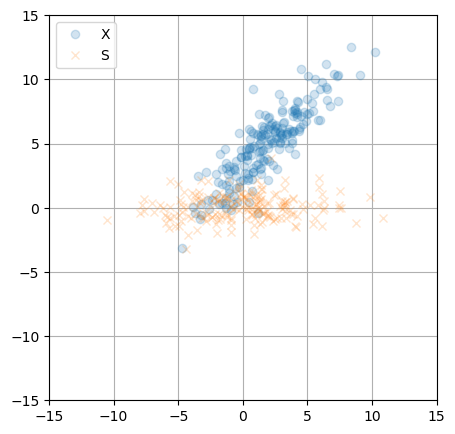

In [67]:
np.random.seed(42)

# generate multiple 2-D (column) vectors
#S is a vector of 2 random variables each with 200 samples
S = scipy.stats.norm(0,1).rvs((2,200))
print(S.shape)

# TODO why scale first random variable by 4?
S[0,:] *= 4  # scale axis 0 by 4
# axis 0 is the first dimension, the first row
print(S[0,:]) # print the first row

f = np.pi / 4    # rotate by 45 degrees 
R = np.array([[np.cos(f), -np.sin(f)],
              [np.sin(f),  np.cos(f)]]) 
X = R @ S # rotate the data by 45 degrees
X += np.array([[2],[5]]) # shift the data by (2,5)

plt.figure(figsize=(5,5))
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.plot(X[0,:], X[1,:], 'o', alpha=0.2) # plot the data points
plt.plot(S[0,:], S[1,:], 'x', alpha=0.2) # plot the data points
plt.legend(['X','S'])
plt.grid()

In [68]:
# subtract sample mean
avg = X.mean(axis=1, keepdims=True) # take the mean of random variable
print(avg.shape)
# This is same as X - E[X] 
X -= avg
# X is now centered at the origin
# compute sample covariance matrix
# TODO ask ta about averaging using axis = 1 which averages the rows, shouldnt we average the columns since we want and average of each random variable?
C = X @ X.T / (X[0,:].size - 1) # this is the sample covariance matrix which is 2x2 and has the variance of the x and y values on the diagonal and the covariance on the off-diagonal
print ("Average\n", avg)
print ("Covariance\n", C)

(2, 1)
Average
 [[1.82396432]
 [4.94540027]]
Covariance
 [[7.07151177 6.44705806]
 [6.44705806 7.7709574 ]]


In your example, you're using the numpy function `np.linalg.eig(C)` to compute the eigenvalues and eigenvectors of the covariance matrix `C`. This function internally solves the characteristic equation for you, so you don't need to manually compute the determinant and solve the equation.

However, if you were to solve the characteristic equation manually, the determinant you would need to compute would be `det(C - λI)`, where:

- `C` is your covariance matrix
- `λ` is a scalar (the eigenvalue you're trying to solve for)
- `I` is the identity matrix of the same size as `C`

You would then set this determinant equal to zero and solve for `λ`. This is a complex task for matrices larger than 2x2, and it's generally more efficient and accurate to use a numerical method like `np.linalg.eig(C)` to compute the eigenvalues and eigenvectors.

The `numpy.linalg.eig()` function computes the eigenvalues and right eigenvectors of a square array. 

The function returns two outputs:

1. `L`: This is a 1D array containing the eigenvalues of the input matrix. In the context of PCA, these values represent the amount of variance explained by each principal component.

2. `E`: This is the matrix whose columns are the right eigenvectors of the input matrix. The eigenvectors correspond to the directions in the data where there is the most variance.

So, in the context of PCA, the `numpy.linalg.eig()` function is used to compute the eigenvalues and eigenvectors of the covariance matrix, which are used to find the directions of maximum variance in the data and the amount of variance along each direction.

In [69]:
# eigenvalues and eigenvectors
# L is a vector of eigenvalues
# E is a matrix with eigenvectors corresponding to eigenvalues in L
# first vector in E corresponds to first value in L and so on
L, E = np.linalg.eig(C) # eigenvalues and eigenvectors are stored in L and E
print("Eigenvalues\n", L)
print("Eigenvectors\n", E)

Eigenvalues
 [ 0.96469808 13.87777109]
Eigenvectors
 [[-0.72600472 -0.68768972]
 [ 0.68768972 -0.72600472]]


The `numpy.linalg.svd()` function performs the Singular Value Decomposition (SVD) of a matrix. In this case, it's being used to decompose the covariance matrix `C`.

The function returns three outputs:

1. `E`: This is the matrix of left singular vectors of `C`. In the context of PCA, these are the eigenvectors of `C`. Each column is an eigenvector. The eigenvectors correspond to the directions in the data where there is the most variance.

2. `L`: This is a 1D array containing the singular values of `C`, which are the square roots of the eigenvalues of `C`. In the context of PCA, the square of these values gives the amount of variance explained by each principal component.

3. `E_same`: This is the matrix of right singular vectors of `C`. For real-valued `C`, `E_same` should be the same as `E` (up to numerical precision), because `C` is a symmetric matrix and its left and right singular vectors are the same. That's why it's named `E_same` in the code.

So, the code is using SVD to compute the eigenvectors and eigenvalues of the covariance matrix `C`, which are used in PCA to find the directions of maximum variance in the data and the amount of variance along each direction.

In [70]:
# this computes the same thing as above
E, L, E_same = np.linalg.svd(C)
print("Esame\n", E_same)
print("Eigenvalues\n", L)
print("Eigenvectors\n", E)

Esame
 [[-0.68768972 -0.72600472]
 [-0.72600472  0.68768972]]
Eigenvalues
 [13.87777109  0.96469808]
Eigenvectors
 [[-0.68768972 -0.72600472]
 [-0.72600472  0.68768972]]


In [71]:
E @ E.T
# produces a 2x2 identity matrix

array([[ 1.00000000e+00, -2.31361573e-16],
       [-2.31361573e-16,  1.00000000e+00]])

In [72]:
np.allclose( E.T, np.linalg.inv(E) ) # check if E is orthogonal

True

In [73]:
# this checks if the matrix is orthogonal   
U, W, V = np.linalg.svd(X)
U, W**2 / (X[0,:].size - 1)

(array([[-0.68768972, -0.72600472],
        [-0.72600472,  0.68768972]]),
 array([13.87777109,  0.96469808]))

In [74]:
# alternatively
U, W**2 / (X.shape[1] - 1)

(array([[-0.68768972, -0.72600472],
        [-0.72600472,  0.68768972]]),
 array([13.87777109,  0.96469808]))

In [75]:
[ np.allclose( U.T @ U, np.eye(U.shape[0]) ), 
  np.allclose( V.T @ V, np.eye(V.shape[0]) )  ]

[True, True]

In [76]:
from sklearn import decomposition
# PCA with scikit-learn
# This is the same as above (finding the eigenvalues and eigenvectors)
pca = decomposition.PCA(n_components = X.shape[0]) # number of components to keep
# components are the eigenvectors
pca.fit(X.T) # different convention: row vs col !!!
pca.components_.T, pca.explained_variance_

(array([[ 0.68768972, -0.72600472],
        [ 0.72600472,  0.68768972]]),
 array([13.87777109,  0.96469808]))

In [77]:
import numpy as np
import pandas as pd
m = np.random.randn(6,4) # random 6x4 matrix
print(m)
df = pd.DataFrame(m, columns=['A','B','C','D'])
df
dates = pd.date_range('20130101', periods=6)
dates

[[-1.59442766 -0.59937502  0.0052437   0.04698059]
 [-0.45006547  0.62284993 -1.06762043 -0.14237949]
 [ 0.12029563  0.51443883  0.71161488 -1.12464209]
 [-1.53411417  1.27767682  0.33231401 -0.74848654]
 [ 1.55115198  0.11567463  1.17929718  0.06751848]
 [ 2.06074792  1.75534084 -0.24896415  0.97157095]]


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')